In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

### Data Acquisition

The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The datasets are made available to public for the purpose of health data analysis. The dataset related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis. The individual data files have been merged together into a single dataset. On initial visual inspection of the data showed some missing values. As the datasets were from WHO, we found no evident errors.<br >
The result indicated that most of the missing data was for population, Hepatitis B and GDP. The missing data were from less known countries like Vanuatu, Tonga, Togo,Cabo Verde etc. Finding all data for these countries was difficult and hence, it was decided that we exclude these countries from the final model dataset. The final merged file(final dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. <br><br>
All predicting variables were then divided into several broad categories:
- Immunization related factors
- Mortality factors
- Economical factors
- Social factors.

In [2]:
df=pd.read_csv('Life Expectancy Data.csv')

### Data Exploration

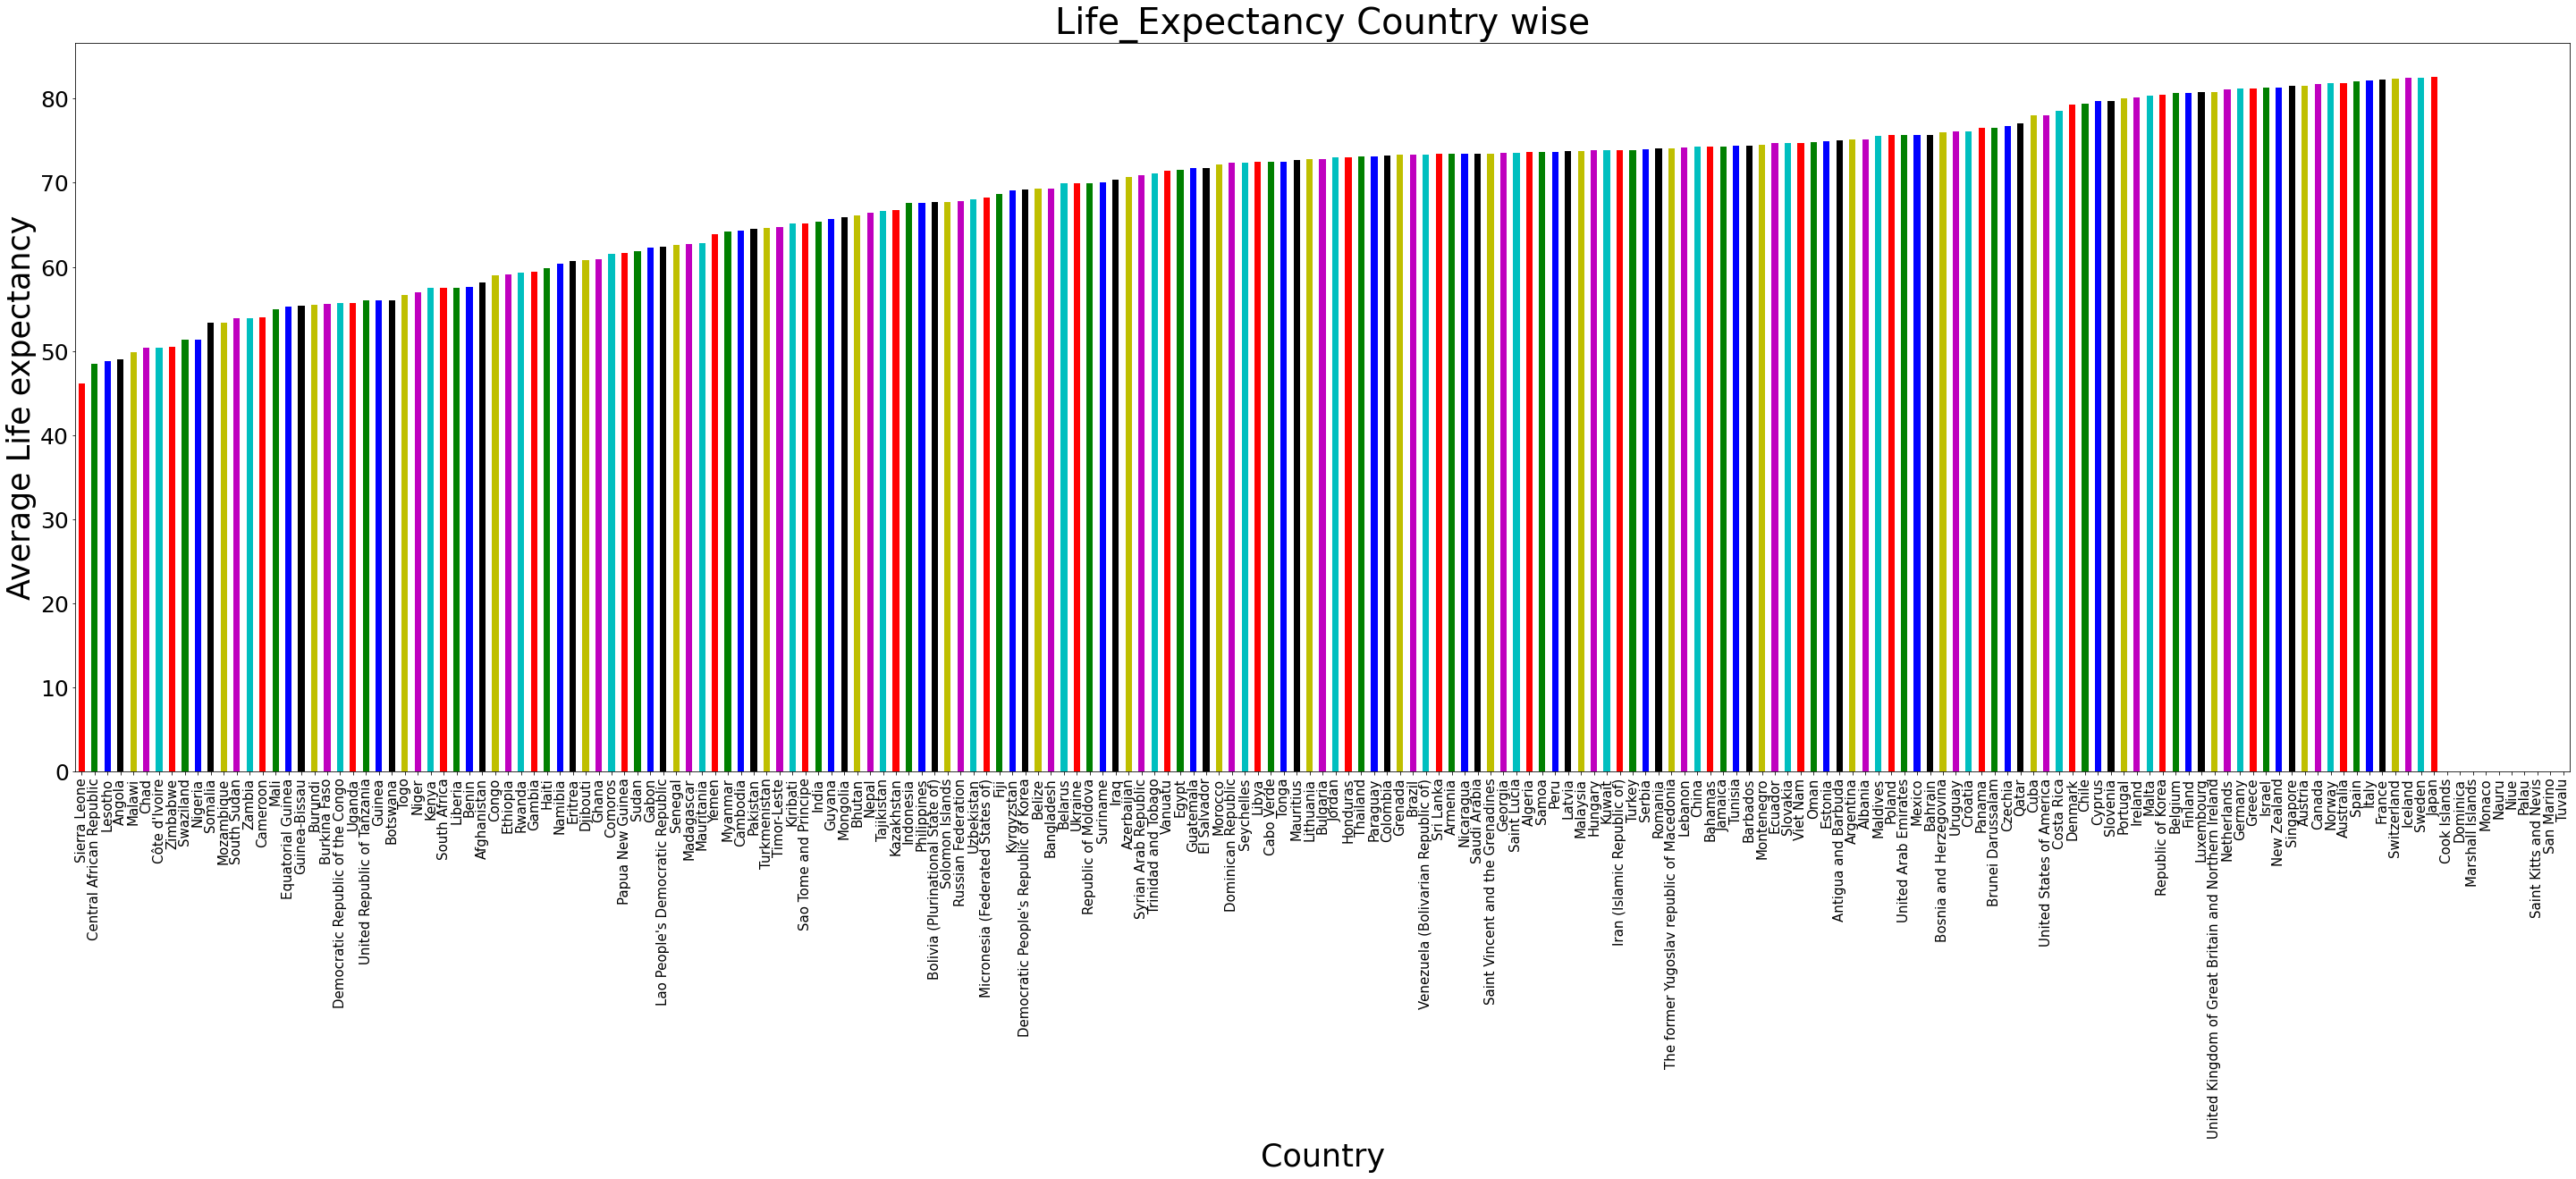

In [3]:
life_country = df.groupby('Country')['Life expectancy '].mean().sort_values(ascending=True)
life_country 
my_colors = list('rgbkymc')
life_country.plot(kind='bar', figsize=(50,15), fontsize=25,color=my_colors)
plt.title("Life_Expectancy Country wise",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Average Life expectancy",fontsize=35)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.show()

In [4]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

### Spaces in column names 
As there are spaces in the column names, We should remove leading and trailing spaces using strip() function in pandas

In [5]:
list_cols=[]
for l in df.columns:
    list_cols.append(l.strip())

In [6]:
df.columns=list_cols

### Columns without significance

- Country and year has no significance in modeling the data as these features are unique for most of the rows so we can safely drop these columns.
- Also status column is categorical so we will one hot encode it.

In [7]:
df=df.join(pd.get_dummies(df['Status']))
df=df.drop(columns=['Country','Year','Status'])

In [8]:
df

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,...,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,0,1
2934,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,...,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,0,1
2935,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,...,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,0,1
2936,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,...,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,0,1


In [9]:
df.describe()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
count,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,...,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000,2938.000000,2938.000000
mean,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,...,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793,0.174268,0.825732
std,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,...,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920,0.379405,0.379405
min,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,...,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000,0.000000,0.000000
25%,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,...,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000,0.000000,1.000000
50%,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,...,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000,0.000000,1.000000
75%,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,...,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000,0.000000,1.000000
max,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,...,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000,1.000000,1.000000


In [10]:
df.columns

Index(['Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Developed', 'Developing'],
      dtype='object')

In [11]:
len(df)

2938

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Life expectancy                  2928 non-null   float64
 1   Adult Mortality                  2928 non-null   float64
 2   infant deaths                    2938 non-null   int64  
 3   Alcohol                          2744 non-null   float64
 4   percentage expenditure           2938 non-null   float64
 5   Hepatitis B                      2385 non-null   float64
 6   Measles                          2938 non-null   int64  
 7   BMI                              2904 non-null   float64
 8   under-five deaths                2938 non-null   int64  
 9   Polio                            2919 non-null   float64
 10  Total expenditure                2712 non-null   float64
 11  Diphtheria                       2919 non-null   float64
 12  HIV/AIDS            

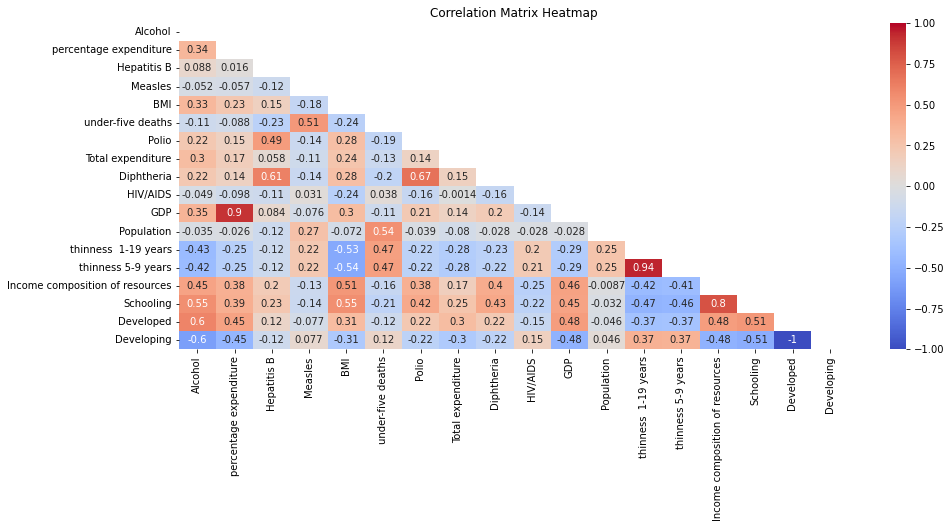

In [13]:
cont_vars = list(df.columns)[3:]
mask = np.triu(df[cont_vars].corr())
plt.figure(figsize=(15,6))
sns.heatmap(df[cont_vars].corr(), annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=mask)
plt.ylim(18, 0)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Missing values visualization

Text(0.5, 1.0, 'The Number of Missing Values per column')

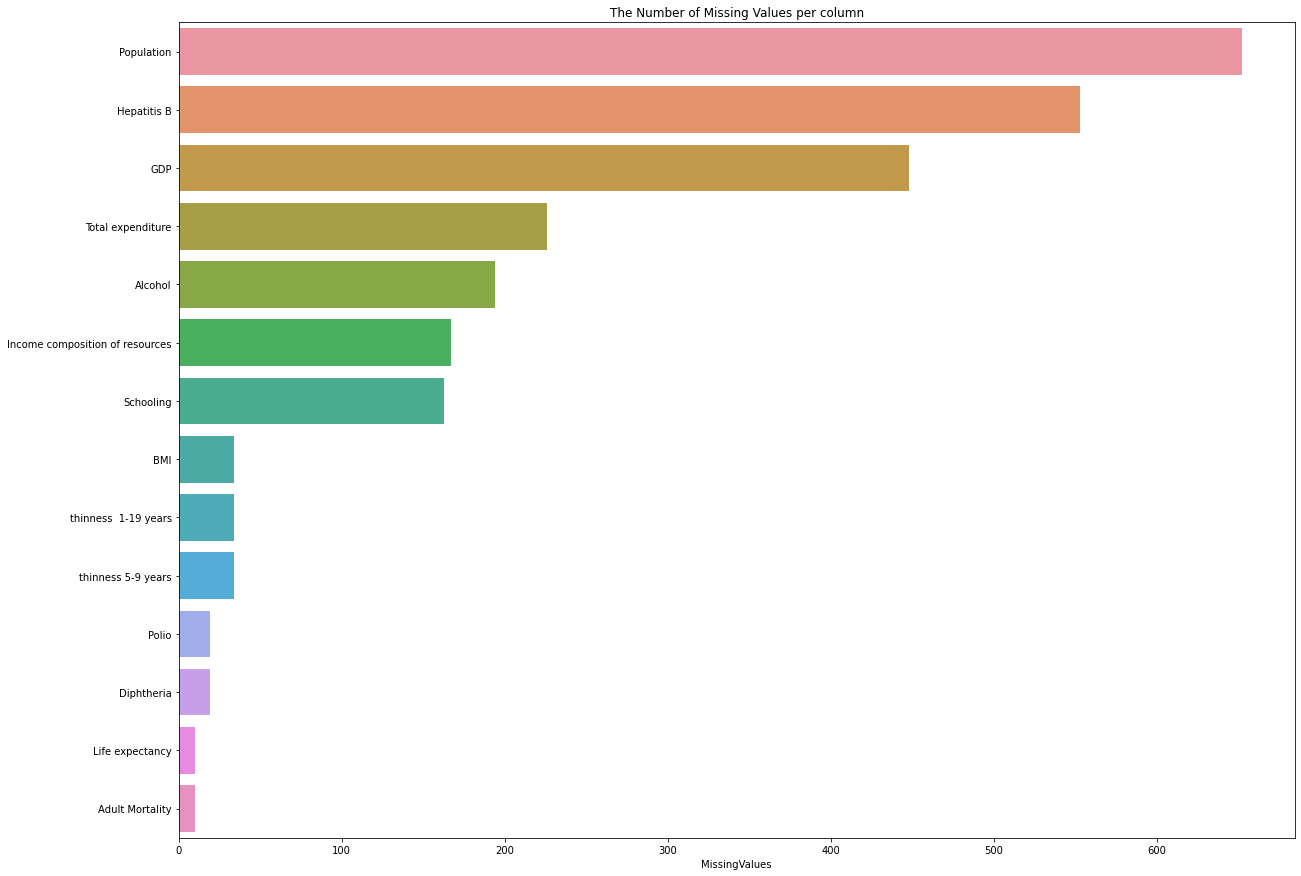

In [14]:
missings_df={}
for key in df.columns:
    if df[key].isnull().sum() > 0:
        missings_df[key]=df[key].isnull().sum()

missings_df=pd.DataFrame(missings_df,index=['MissingValues']).T.sort_values(by='MissingValues',ascending=False)
plt.figure(figsize=(20,15))
sns.barplot(x=missings_df.MissingValues,y=missings_df.index,orient = 'h').set_title('The Number of Missing Values per column')

### Missing Values Imputation using Random Forest Regressor
We can see from the information on columns that there are lots of null values in Hepatitis B and GDP of the countries. We can impute the missing values with mean of the countries but it wouldn't make sense as putting average GDP for an extremely poor country will confuse the model.

However, as we can see from the heatmap that GDP and percentage expenditure are highly correlated. We can just take percentage expenditure to train our model and remove GDP from the list of features as it wouldn't contribute much to the final results.
For the features such as Population, Income composition of resources, Schooling, Hepatitis B, Total expenditure and Alcohol which are not highly correlated with any other feature, we can use random forest regressor to impute missing values of those features based on other available values. <span style="text-decoration:underline">
However, We will not take life expectancy into consideration as it is our final goal to predict life expectancy and if we include it to impute missing values then it can introduce some bias in the model.
</span>

Following is the code where I do that by putting all features which have a lot of missing values in a loop and train the model at every iteration for each feature.


In [15]:
df.columns

Index(['Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Developed', 'Developing'],
      dtype='object')

In [16]:
from sklearn.ensemble import RandomForestRegressor

cols_missing=['Population','Income composition of resources','Schooling','Hepatitis B','Total expenditure','Alcohol']
i=len(cols_missing)

cols_all=['Adult Mortality',
       'infant deaths', 'percentage expenditure', 
       'Measles', 'BMI', 'under-five deaths', 'Polio',
       'Diphtheria', 'HIV/AIDS',
       'thinness  1-19 years', 'thinness 5-9 years','Developed','Developing','Population',
          'Income composition of resources','Schooling','Hepatitis B','Total expenditure','Alcohol','Life expectancy']

for missing in cols_missing:
    cols=['Adult Mortality',
       'infant deaths', 'percentage expenditure', 
       'Measles', 'BMI', 'under-five deaths', 'Polio',
       'Diphtheria', 'HIV/AIDS',
       'thinness  1-19 years', 'thinness 5-9 years','Developed','Developing']
    cols.append(missing)
    df_missing_Population_impute=df[cols]
    X_train=df_missing_Population_impute[df_missing_Population_impute[missing].notna()]
    X_test=df_missing_Population_impute[df_missing_Population_impute[missing].isna()]
    X_train_1=X_train.drop(columns=[missing]).dropna()
    X_test_1=X_test.drop(columns=[missing]).dropna()
    X_train=X_train_1.join(X_train,rsuffix='_x')[cols]
    X_test=X_test_1.join(X_test,rsuffix='_x')[cols]
    y_train=X_train[missing]
    y_test=X_test[missing]
    cols_train=[l for l in X_train.columns if missing not in l]
    X_train=X_train[cols_train]
    X_test=X_test[cols_train]
    lm = RandomForestRegressor()
    model = lm.fit(X_train,y_train)
    y_test=model.predict(X_test) 
    X_test[missing]=y_test
    X_train[missing]=y_train
    df_1=X_train.append(X_test)
    df=df_1.join(df,rsuffix='_x')[cols_all]
    

In [17]:
df.dropna()

,Adult Mortality,infant deaths,percentage expenditure,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Developed,Developing,Population,Income composition of resources,Schooling,Hepatitis B,Total expenditure,Alcohol,Life expectancy
0,263.0,62,71.279624,1154,19.1,83,6.0,65.0,0.1,17.2,17.3,0,1,33736494.0,0.479,10.1,65.00,8.1600,0.0100,65.0
1,271.0,64,73.523582,492,18.6,86,58.0,62.0,0.1,17.5,17.5,0,1,327582.0,0.476,10.0,62.00,8.1800,0.0100,59.9
2,268.0,66,73.219243,430,18.1,89,62.0,64.0,0.1,17.7,17.7,0,1,31731688.0,0.470,9.9,64.00,8.1300,0.0100,59.9
3,272.0,69,78.184215,2787,17.6,93,67.0,67.0,0.1,17.9,18.0,0,1,3696958.0,0.463,9.8,67.00,8.5200,0.0100,59.5
4,275.0,71,7.097109,3013,17.2,97,68.0,68.0,0.1,18.2,18.2,0,1,2978599.0,0.454,9.5,68.00,7.8700,0.0100,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1154,134.0,0,0.000000,0,64.8,0,99.0,99.0,0.1,1.6,1.6,1,0,984328.0,0.834,15.6,98.99,7.8496,7.9949,75.8
1170,49.0,0,0.000000,0,61.0,0,92.0,92.0,0.1,1.0,0.9,1,0,33815.0,0.919,19.0,87.11,6.9394,6.1815,82.7
1314,55.0,2,0.000000,35,29.0,3,99.0,96.0,0.1,2.1,1.8,1,0,127141.0,0.902,15.3,94.05,3.7853,2.2543,83.7
2345,74.0,0,0.000000,18,6.1,0,95.0,95.0,0.1,1.4,1.3,1,0,263531.0,0.888,17.3,86.76,6.1299,9.9247,88.0


### Checking distribution of data after missing values imputation

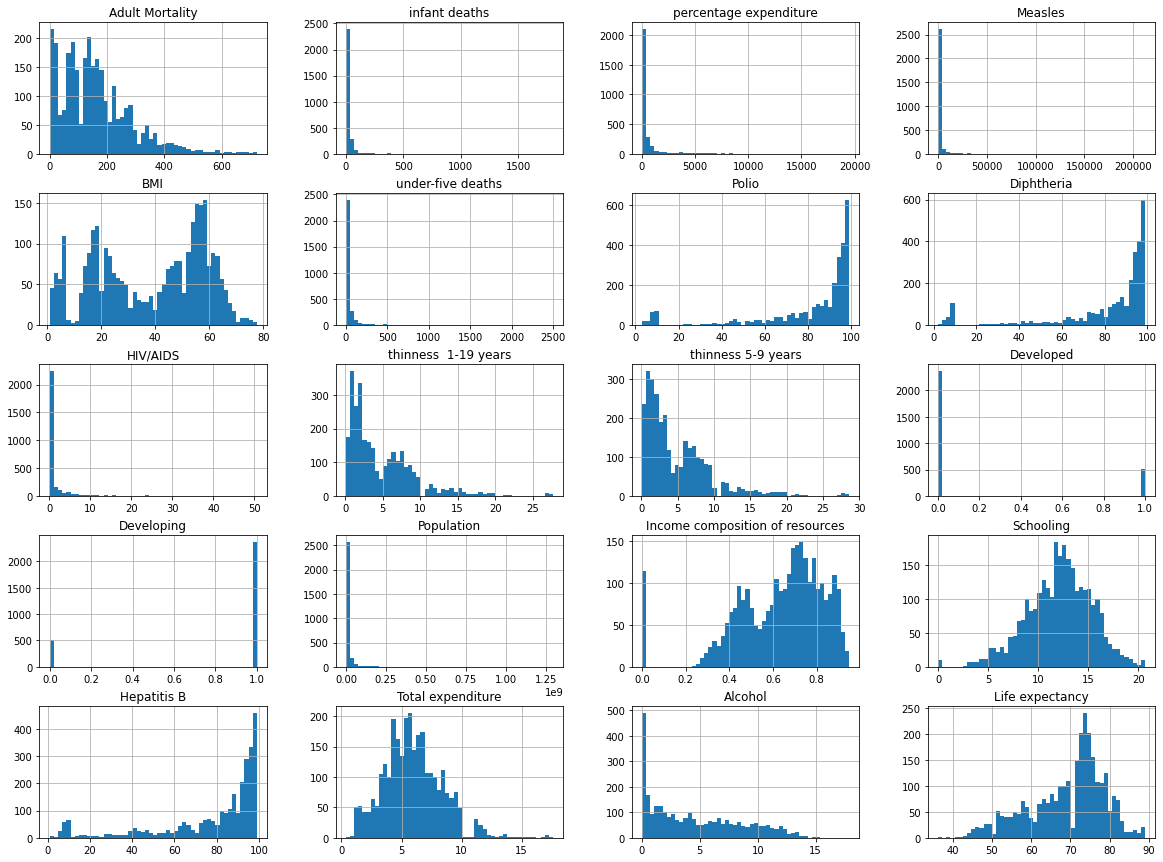

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [19]:
df.columns

Index(['Adult Mortality', 'infant deaths', 'percentage expenditure', 'Measles',
       'BMI', 'under-five deaths', 'Polio', 'Diphtheria', 'HIV/AIDS',
       'thinness  1-19 years', 'thinness 5-9 years', 'Developed', 'Developing',
       'Population', 'Income composition of resources', 'Schooling',
       'Hepatitis B', 'Total expenditure', 'Alcohol', 'Life expectancy'],
      dtype='object')

### Outlier Detection
To detect outliers, we made box plots and also applied tukey's rule to detect how many outliers are there in the data.

Tukey’s rule says that the outliers are values more than 1.5 times the interquartile range from the quartiles — either below Q1 − 1.5IQR, or above Q3 + 1.5IQR.

But for this dataset, as it is factual information of different countries, We should not remove outliers.

In [20]:
len(df.columns)

20

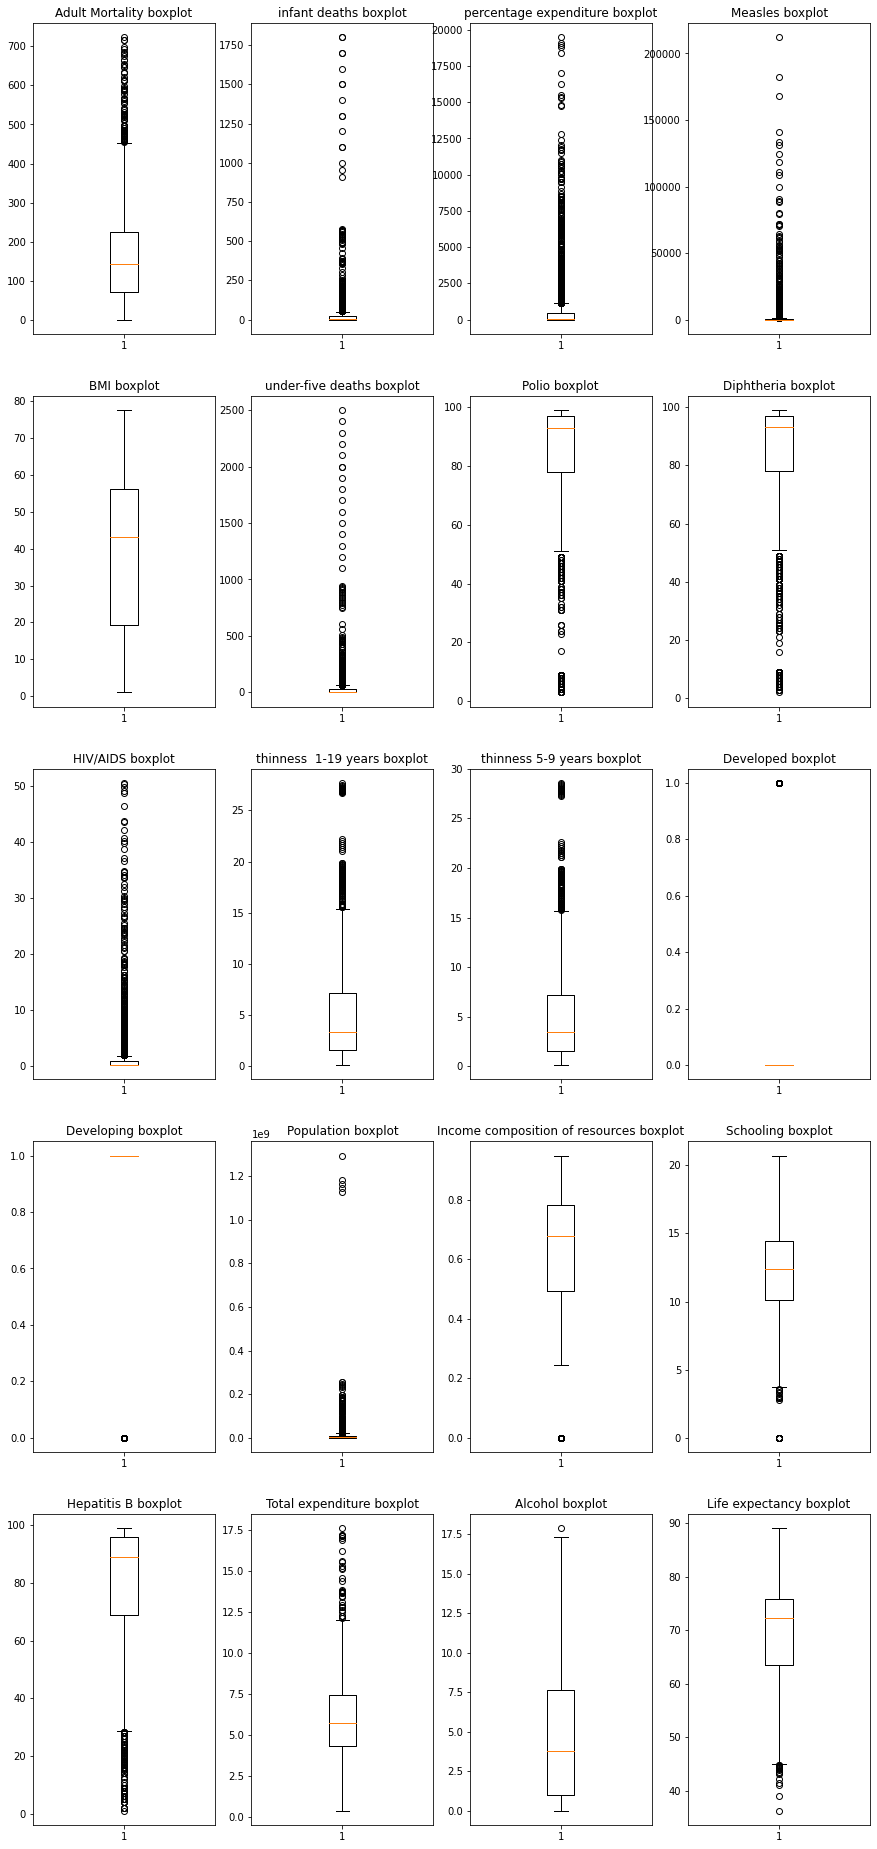

In [21]:
cont_vars = list(df.columns)
def outliers_visual(data):
    plt.figure(figsize=(15, 40))
    i = 0
    for col in cont_vars:
        i += 1
        plt.subplot(6, 4, i)
        plt.boxplot(data[col])
        plt.title('{} boxplot'.format(col))
    plt.show()
outliers_visual(df)

In [22]:
def outlier_count(col, data=df):
    print(15*'-' + col + 15*'-')
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    print('Number of outliers: {}'.format(outlier_count))
    print('Percent of data that is outlier: {}%'.format(outlier_percent))
for col in df.columns:
    outlier_count(col)


---------------Adult Mortality---------------
Number of outliers: 87
Percent of data that is outlier: 3.01%
---------------infant deaths---------------
Number of outliers: 329
Percent of data that is outlier: 11.39%
---------------percentage expenditure---------------
Number of outliers: 377
Percent of data that is outlier: 13.05%
---------------Measles---------------
Number of outliers: 536
Percent of data that is outlier: 18.56%
---------------BMI---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------under-five deaths---------------
Number of outliers: 396
Percent of data that is outlier: 13.71%
---------------Polio---------------
Number of outliers: 273
Percent of data that is outlier: 9.45%
---------------Diphtheria---------------
Number of outliers: 292
Percent of data that is outlier: 10.11%
---------------HIV/AIDS---------------
Number of outliers: 526
Percent of data that is outlier: 18.21%
---------------thinness  1-19 years---------------
N

### Feature Engineering

In [23]:
df['Disease']=df['Hepatitis B']+df['Measles']+df['Diphtheria']+ df['HIV/AIDS']

### Train test split

In [24]:
from sklearn.model_selection import train_test_split
X=df[[cols for cols in df.columns if 'Life expectancy' not in cols]]
y=df['Life expectancy']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

### Feature selection using Lasso regression

- Made a pipeline to standardize the features using standard scaler and then train the model on Lasso regression.<br />
- Made a search for best alpha value using grid search.<br />
- On the best alpha value I trained the model and used whatever features were selected in train and test sets.<br />

In [25]:
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso

pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=1
                      )
search.fit(X_train,y_train)


print("Best alpha value for lasso regression",search.best_params_)
coefficients = search.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)
features=X_train.columns
features_selected=np.array(features)[importance > 0]
print('Features with importance>0', features_selected)

print('Features with no importance', np.array(features)[importance == 0])

X_train=X_train[features_selected]
X_test=X_test[features_selected]

Fitting 5 folds for each of 99 candidates, totalling 495 fits
Best alpha value for lasso regression {'model__alpha': 0.1}
Features with importance>0 ['Adult Mortality' 'percentage expenditure' 'Measles' 'BMI'
 'under-five deaths' 'Polio' 'Diphtheria' 'HIV/AIDS'
 'thinness  1-19 years' 'Developed' 'Income composition of resources'
 'Schooling' 'Hepatitis B']
Features with no importance ['infant deaths' 'thinness 5-9 years' 'Developing' 'Population'
 'Total expenditure' 'Alcohol' 'Disease']


In [26]:
pd.DataFrame.from_dict(dict(zip(importance,features)),orient='index').reset_index().rename(columns={'index':'Importance',0:'Param'}).sort_values('Importance',ascending=False)


,Importance,Param
12,2.950690,Schooling
8,2.387123,HIV/AIDS
0,2.116237,Adult Mortality
11,1.545501,Income composition of resources
6,0.719744,Polio
7,0.600689,Diphtheria
4,0.559515,BMI
2,0.466835,percentage expenditure
10,0.295484,Developed
9,0.253796,thinness 1-19 years


### Model training
- Trained the model putting multiple models in a dictionary and checking the MSE value on each of them
- For linear regression, I put a condition to check if the model is linear regression then we need to train the model on scaled features
- For random forest, gradient search and decision trees we don't need feature scaling as tree based algorithms don't need to scale features
- Checked the time it takes for each model to fit the data for comparison
- Trained the models on default hyperparameters to see what models perform best in terms of MSE and R^2.
- I will tune the hyperparameter for the model that performs best on default values

In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

import time
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

model_list=[]
mse=[]
time_taken=[]
r2=[]
i=0
dict_classifiers = {
    "Linear Regression":LinearRegression(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boost": GradientBoostingRegressor()
}
for model, model_instantiation in dict_classifiers.items():
    print('\n'+model)
    temp=model
    model_list.append(model)
    start = time.process_time()
    model = model_instantiation
    if(temp=="Linear Regression"):
        model=model.fit(X_train_scaled,y_train)
    else:
        model=model.fit(X_train,y_train)
    time_taken.append(time.process_time() - start)
    score=model.score(X_train,y_train)
    if(temp=="Linear Regression"):
        predictions_model=model.predict(X_test_scaled)
    else:
        predictions_model=model.predict(X_test)
    mse.append(mean_squared_error(y_test,predictions_model))
    r2.append(r2_score(y_test.values.ravel(), predictions_model))
    i=i+1
df_acc=pd.DataFrame(list(zip(model_list,time_taken,mse,r2)),columns=['Model','Time taken','MSE','R^2'])

df_acc.to_excel('Model_Comparision.xlsx',index=False)



Linear Regression

Decision Tree Regression

Random Forest

Gradient Boost


### Model Comparison
- We have prepared a dataframe at the time of model training
- We can visualize the metrics using bar plots to see which model performs the best with default hyperparameters
- From the comparison, it becomes clear that random forest model gives the lowest MSE so we can safely use that model

In [28]:
df_acc

,Model,Time taken,MSE,R^2
0,Linear Regression,0.002566,16.620803,0.826243
1,Decision Tree Regression,0.071738,9.882687,0.896685
2,Random Forest,1.361191,4.515646,0.952793
3,Gradient Boost,0.434380,5.689440,0.940522


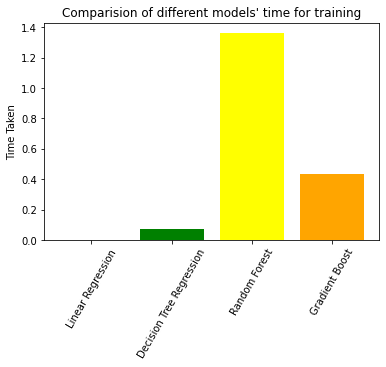

In [29]:
plt.bar(df_acc.Model, df_acc['Time taken'], color=['blue', 'green', 'yellow','orange','red'])
plt.xticks(rotation=60)
plt.ylabel('Time Taken')
plt.title('Comparision of different models\' time for training')
plt.show()

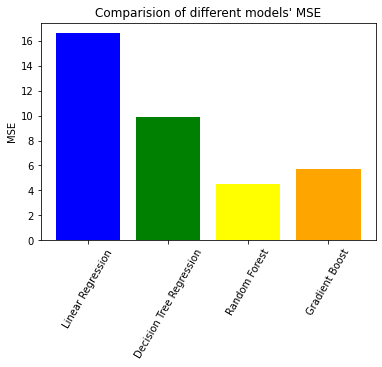

In [30]:
plt.bar(df_acc.Model, df_acc.MSE, color=[  'blue', 'green', 'yellow','orange','red'])
plt.xticks(rotation=60)
plt.ylabel('MSE')
plt.title('Comparision of different models\' MSE')
plt.show()

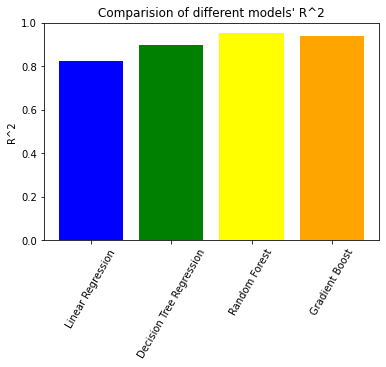

In [31]:
plt.bar(df_acc.Model, df_acc['R^2'], color=[  'blue', 'green', 'yellow','orange','red'])
plt.xticks(rotation=60)
plt.ylabel('R^2')
plt.title('Comparision of different models\' R^2')
plt.show()

### Hyperparameter tuning on Random forest

- Hyperparameter tuning using GridSearchCV on best model with default values
- I took 4 parameters to tune the model on oob_score, min_samples_split, n_estimators and max_depth
- Ran grid search with cv=10 , meaning 10 fold cross validation
- Checked the model best parameters

In [32]:
'''
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
rf=RandomForestRegressor()
parameters = { "oob_score": [True,False],
               "min_samples_split": [1,2,3],
               "n_estimators": [150,200,250],
               "max_depth":[12,14,16]
             }

grid = GridSearchCV(rf, param_grid = parameters,verbose=3,n_jobs=2,cv = 10)
grid.fit(X_train,y_train)
print(grid.best_params_)
print(grid.best_score_)
'''

'\nX_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)\nrf=RandomForestRegressor()\nparameters = { "oob_score": [True,False],\n               "min_samples_split": [1,2,3],\n               "n_estimators": [150,200,250],\n               "max_depth":[12,14,16]\n             }\n\ngrid = GridSearchCV(rf, param_grid = parameters,verbose=3,n_jobs=2,cv = 10)\ngrid.fit(X_train,y_train)\nprint(grid.best_params_)\nprint(grid.best_score_)\n'

### Model training with tuned parameters

In [33]:
import time
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

model_list=[]
mse=[]
time_taken=[]
r2=[]
i=0
dict_classifiers = {
    "Random Forest": RandomForestRegressor(max_depth=16, min_samples_split=2, n_estimators=200, oob_score=True),
}
for model, model_instantiation in dict_classifiers.items():
    print('\n'+model)
    temp=model
    model_list.append(model)
    start = time.process_time()
    model = model_instantiation
    model=model.fit(X_train,y_train)
    time_taken.append(time.process_time() - start)
    score=model.score(X_train,y_train)
    predictions_model=model.predict(X_test)
    mse.append(mean_squared_error(y_test,predictions_model))
    r2.append(r2_score(y_test.values.ravel(), predictions_model))
    i=i+1
df_acc=pd.DataFrame(list(zip(model_list,time_taken,mse,r2)),columns=['Model','Time taken','MSE','R^2'])


Random Forest


In [34]:
df_acc

,Model,Time taken,MSE,R^2
0,Random Forest,2.708501,4.506816,0.952885


##### As we can see from the dataframe, that MSE has slightly reduced and R^2 has increased meaning that model is now able to capure more variation within the data

In [35]:
n_samples=len(df)
n_features = len(df.columns)

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from causalml.inference.meta import BaseSRegressor, BaseTRegressor, BaseXRegressor, BaseRRegressor
from causalml.inference.tree import UpliftTreeClassifier, UpliftRandomForestClassifier
from causalml.dataset.regression import synthetic_data
from sklearn.linear_model import LinearRegression
import shap
import matplotlib.pyplot as plt
import time
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
import os
import warnings
warnings.filterwarnings('ignore')
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'  # for lightgbm to work
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [37]:
plt.style.use('fivethirtyeight')

In [38]:
y, X, w, tau, b, e = synthetic_data(mode=1, n=n_samples, p=n_features, sigma=0.5)

In [39]:
temp = pd.DataFrame(zip(y, X, w, tau, b, e), columns=['y', 'X', 'w', 'tau', 'b', 'e'])
temp.head()

,y,X,w,tau,b,e
0,0.801063,"[0.4300315387512571, 0.6143904946926995, 0.334...",0,0.522211,0.932680,0.737953
1,1.867509,"[0.972381741733434, 0.20450898216945013, 0.158...",0,0.588445,2.155058,0.584886
2,1.620413,"[0.7786751933671685, 0.1680263284567901, 0.762...",1,0.473351,1.205448,0.399562
3,1.476943,"[0.8673904831160408, 0.6077750289077681, 0.727...",1,0.737583,1.612052,0.900000
4,2.423279,"[0.3836141042583425, 0.6304983271779017, 0.971...",1,0.507056,2.535429,0.688813


In [40]:
X=df[[cols for cols in df.columns if 'Life expectancy' not in cols and 'Developed' not in cols]]
y=df['Life expectancy']
w = df['Developed']  

In [41]:
w_multi = np.array(['treatment_A' if x==1 else 'control' for x in w])
e_multi = {'treatment_A': e}

In [42]:
e_multi

{'treatment_A': array([0.73795275, 0.5848861 , 0.39956245, ..., 0.9       , 0.22133476,
        0.9       ])}

In [43]:
feature_names = X.columns
feature_names

Index(['Adult Mortality', 'infant deaths', 'percentage expenditure', 'Measles',
       'BMI', 'under-five deaths', 'Polio', 'Diphtheria', 'HIV/AIDS',
       'thinness  1-19 years', 'thinness 5-9 years', 'Developing',
       'Population', 'Income composition of resources', 'Schooling',
       'Hepatitis B', 'Total expenditure', 'Alcohol', 'Disease'],
      dtype='object')

#### Estimate the Average Treatment Effect (ATE).

In [44]:
model_tau = XGBRegressor(importance_type='gain') 
base_algo = XGBRegressor()
#model_tau=RandomForestRegressor(max_depth=16, min_samples_split=2, n_estimators=200, oob_score=True)
#base_algo=RandomForestRegressor()

slearner = BaseSRegressor(base_algo, control_name='control')
slearner.estimate_ate(X, w_multi, y)

array([0.28974574])

##### predict(X, treatment, y)

In [45]:
slearner_tau = slearner.fit_predict(X, w_multi, y)

In [46]:
slearner_tau

array([[ 0.42105865],
       [ 0.42105103],
       [ 0.42105103],
       ...,
       [ 0.1326828 ],
       [-0.18183136],
       [-0.18183136]])

In [47]:
##tau (np.array) – a treatment effect vector (estimated/actual)

slearner.get_importance(X=X, 
                        tau=slearner_tau,
                        normalize=True, 
                        method='auto', 
                        features=feature_names)

{'treatment_A': thinness 5-9 years                 0.345681
 Schooling                          0.181891
 Total expenditure                  0.156300
 Adult Mortality                    0.120919
 Polio                              0.052443
 BMI                                0.044178
 thinness  1-19 years               0.034665
 Alcohol                            0.019007
 percentage expenditure             0.016835
 Income composition of resources    0.010392
 Diphtheria                         0.007292
 Population                         0.003059
 Hepatitis B                        0.002069
 under-five deaths                  0.001599
 Disease                            0.001272
 Measles                            0.000859
 infant deaths                      0.000819
 HIV/AIDS                           0.000722
 Developing                         0.000000
 dtype: float64}

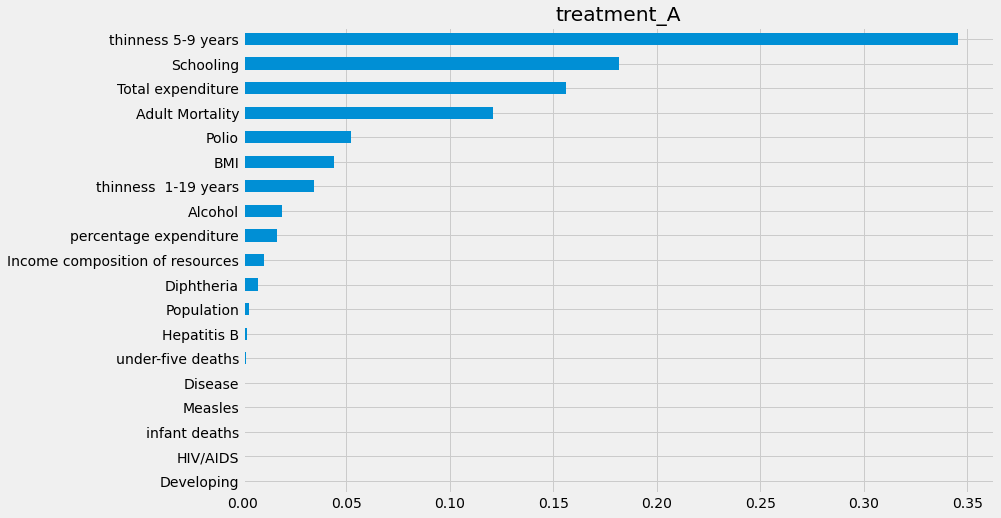

In [48]:
# Auto method
slearner.plot_importance(X=X, 
                         tau=slearner_tau, 
                         normalize=True, 
                         method='auto', 
                         features=feature_names)

In [49]:
# Permutation method for feature importance
slearner.get_importance(X=X, 
                        tau=slearner_tau, 
                        method='permutation', 
                        features=feature_names, 
                        random_state=42)

{'treatment_A': Schooling                          0.340792
 Adult Mortality                    0.276923
 Total expenditure                  0.255810
 Polio                              0.190544
 thinness 5-9 years                 0.186791
 BMI                                0.120455
 thinness  1-19 years               0.087381
 percentage expenditure             0.047035
 Alcohol                            0.030760
 Income composition of resources    0.010587
 Diphtheria                         0.002934
 infant deaths                      0.001937
 Disease                            0.000902
 Population                         0.000650
 Measles                            0.000573
 Hepatitis B                        0.000525
 under-five deaths                  0.000492
 HIV/AIDS                           0.000449
 Developing                        -0.000194
 dtype: float64}

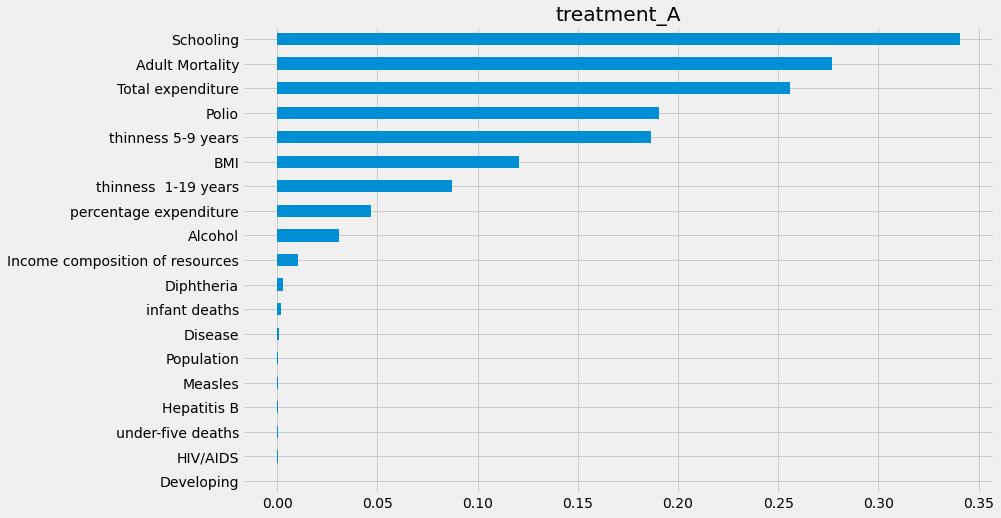

In [50]:
slearner.plot_importance(X=X, 
                         tau=slearner_tau, 
                         method='permutation', 
                         features=feature_names, 
                         random_state=42)

### Permutation Importance on test set

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, slearner_tau, test_size=0.3, random_state=42)
model_tau_fit = model_tau.fit(X_train, y_train)

perm_imp_test = permutation_importance(
    estimator=model_tau_fit, 
    X=X_test, 
    y=y_test, 
    random_state=42).importances_mean
pd.Series(perm_imp_test, feature_names).sort_values(ascending=False)


Schooling                          0.350473
Adult Mortality                    0.290086
Total expenditure                  0.257272
thinness 5-9 years                 0.237638
Polio                              0.180464
BMI                                0.109124
thinness  1-19 years               0.064049
percentage expenditure             0.045650
Income composition of resources    0.039222
Alcohol                            0.027490
Measles                            0.004248
Diphtheria                         0.003934
infant deaths                      0.003258
Population                         0.002251
HIV/AIDS                           0.001906
under-five deaths                  0.001108
Disease                            0.000402
Hepatitis B                        0.000303
Developing                         0.000004
dtype: float64

In [52]:
plt.style.use('fivethirtyeight')

Text(0.5, 1.0, 'Permutation Importances on Test Dataset')

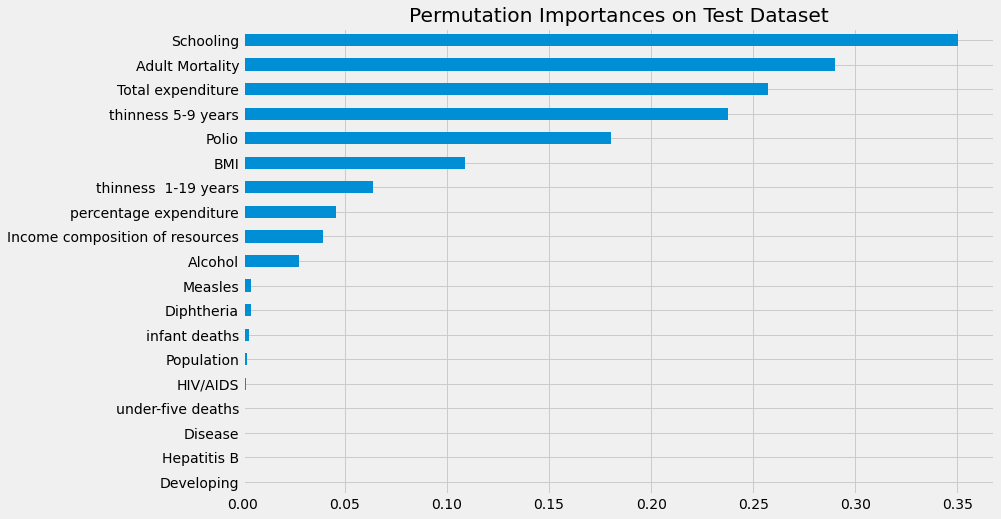

In [53]:
pd.Series(perm_imp_test, feature_names).sort_values().plot(kind='barh', figsize=(12, 8))
plt.title('Permutation Importances on Test Dataset')

### Permutation Importance on train set

In [54]:
perm_imp_train = permutation_importance(
    estimator=model_tau_fit, 
    X=X_train, 
    y=y_train, 
    random_state=42).importances_mean
pd.Series(perm_imp_train, feature_names).sort_values(ascending=False)

Schooling                          0.329658
Adult Mortality                    0.289118
Total expenditure                  0.277887
thinness 5-9 years                 0.237699
Polio                              0.208029
BMI                                0.121871
thinness  1-19 years               0.058638
percentage expenditure             0.047035
Income composition of resources    0.037760
Alcohol                            0.028746
Population                         0.008217
Diphtheria                         0.006162
infant deaths                      0.005690
Measles                            0.005058
Hepatitis B                        0.002358
Disease                            0.002239
HIV/AIDS                           0.001970
under-five deaths                  0.000741
Developing                         0.000257
dtype: float64

Text(0.5, 1.0, 'Permutation Importances on Training Dataset')

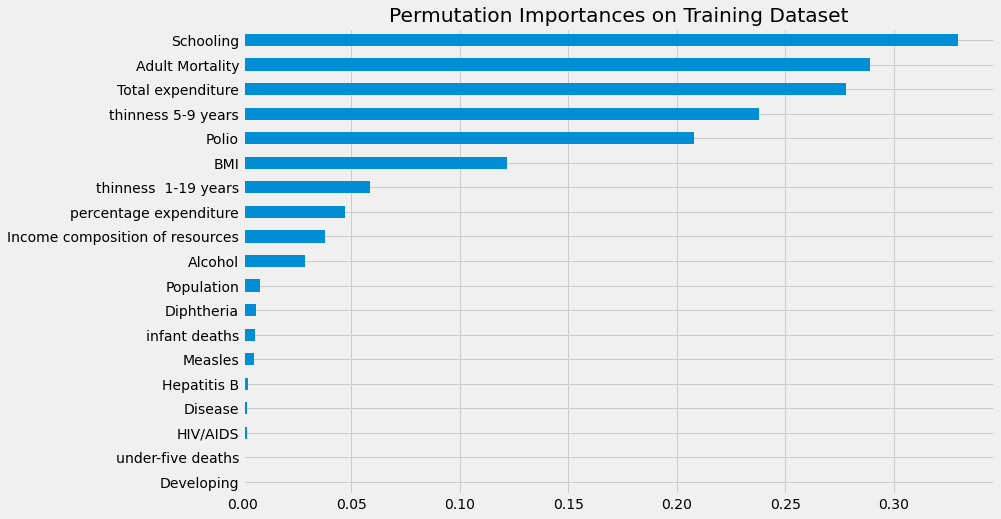

In [55]:
pd.Series(perm_imp_train, feature_names).sort_values().plot(kind='barh', figsize=(12, 8))
plt.title('Permutation Importances on Training Dataset')

## Interpretation 1
When we try to find feature importance by tree based methods using S Learner , Total expenditure comes out to be the best predictor for predicting life expectancy of a particular country.

However when we find the feature importance by permutation based feature importance methods , the order of important features changes considerably. The most important feature comes out to be Adult Mortality.

it is because tree based  method can give high importance to features that may not be predictive on unseen data when the model is overfitting. Permutation-based feature importance, on the other hand, avoids this issue, since it can be computed on unseen data. Furthermore, impurity-based feature importance for trees are strong biased and favor high cardinality features over low cardinality features such as binary features or categorical variables with a small number of possible categories.

It means feature importance by permutation give much better features than feature selection using gini impurity.
Hence,Adult Mortality and under-five deaths are major causes of decrease in life expectancy.

In [56]:
shap_slearner = slearner.get_shap_values(X=X, tau=slearner_tau)
shap_slearner

{'treatment_A': array([[ 1.63587915e-02, -2.07640710e-05, -7.42290093e-04, ...,
         -7.01938174e-02, -1.25143030e-02,  6.03253789e-04],
        [ 1.81125317e-02, -2.54360156e-04, -7.32514189e-05, ...,
         -7.10257211e-02, -1.53811289e-02, -1.73917522e-03],
        [ 1.67482827e-02,  1.29892601e-04, -1.00516751e-03, ...,
         -6.98237264e-02, -1.13946173e-02,  1.03721319e-04],
        ...,
        [-5.26790888e-03, -9.88727459e-04, -1.56289124e-02, ...,
          6.25258203e-02,  4.58051464e-02,  4.60354736e-04],
        [-4.41488784e-02,  1.12879200e-03, -4.94793970e-02, ...,
         -7.08052645e-03, -7.86170930e-03,  1.84647231e-03],
        [-3.21992312e-02,  5.36501670e-04, -6.27288448e-02, ...,
         -5.38034837e-02, -1.02498966e-02,  1.97089828e-03]])}

In [57]:
np.mean(np.abs(shap_slearner['treatment_A']),axis=0)

array([0.05349211, 0.00100014, 0.01626287, 0.00151233, 0.04135172,
       0.00210889, 0.05085155, 0.00770555, 0.00094434, 0.04089862,
       0.10655306, 0.        , 0.00433385, 0.00713225, 0.12504409,
       0.00342833, 0.07068328, 0.01427925, 0.00208395])

In [58]:
slearner_tau,shap_slearner

(array([[ 0.42105865],
        [ 0.42105103],
        [ 0.42105103],
        ...,
        [ 0.1326828 ],
        [-0.18183136],
        [-0.18183136]]),
 {'treatment_A': array([[ 1.63587915e-02, -2.07640710e-05, -7.42290093e-04, ...,
          -7.01938174e-02, -1.25143030e-02,  6.03253789e-04],
         [ 1.81125317e-02, -2.54360156e-04, -7.32514189e-05, ...,
          -7.10257211e-02, -1.53811289e-02, -1.73917522e-03],
         [ 1.67482827e-02,  1.29892601e-04, -1.00516751e-03, ...,
          -6.98237264e-02, -1.13946173e-02,  1.03721319e-04],
         ...,
         [-5.26790888e-03, -9.88727459e-04, -1.56289124e-02, ...,
           6.25258203e-02,  4.58051464e-02,  4.60354736e-04],
         [-4.41488784e-02,  1.12879200e-03, -4.94793970e-02, ...,
          -7.08052645e-03, -7.86170930e-03,  1.84647231e-03],
         [-3.21992312e-02,  5.36501670e-04, -6.27288448e-02, ...,
          -5.38034837e-02, -1.02498966e-02,  1.97089828e-03]])})

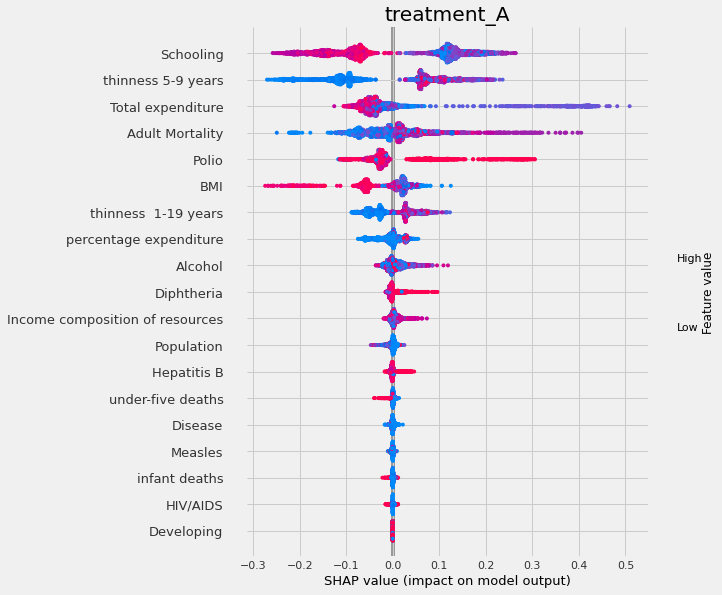

In [59]:
# Plotting shap values
slearner.plot_shap_values(X=X, tau=slearner_tau, features=feature_names)

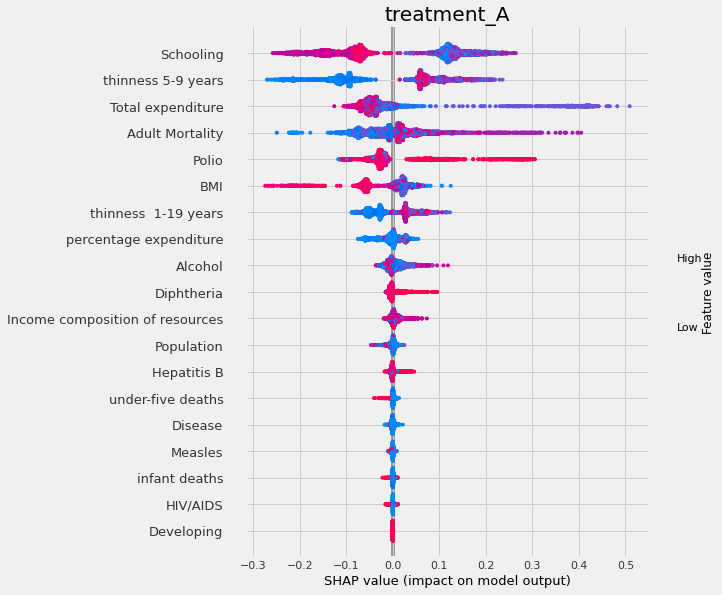

In [60]:
# Plot shap values WITH specifying shap_dict
slearner.plot_shap_values(X=X, shap_dict=shap_slearner, features=feature_names)

## Interpretation 2
When we plot shap values, we can see some good correlations with the output variable .i.e Life expectancy. <br>
A high level of the “Income Composition of Resources” has a high and positive impact on the average Life expectancy of the country. The “high” comes from the red color, and the “positive” impact is shown on the X-axis.<br> Similarly, we will say the “Total expenditure” is negatively correlated with the target variable Life Expectancy.


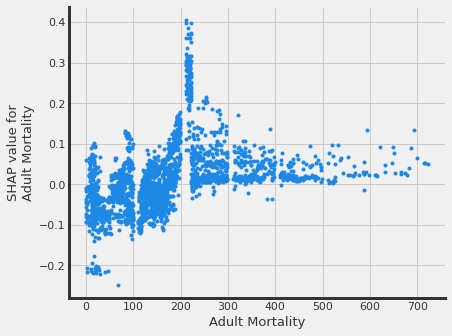

In [61]:
slearner.plot_shap_dependence(treatment_group='treatment_A',
                              feature_idx=0,
                              X=X,
                              tau=slearner_tau,
                              interaction_idx=None,
                              shap_dict=shap_slearner,
                              features=feature_names)

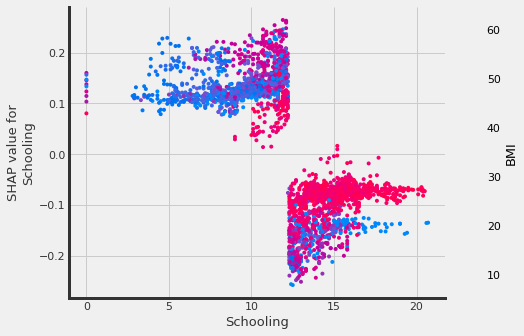

In [62]:
# auto interaction
slearner.plot_shap_dependence(treatment_group='treatment_A',
                              feature_idx='Schooling',
                              X=X,
                              tau=slearner_tau,
                              interaction_idx='auto',
                              shap_dict=shap_slearner,
                              features=feature_names)

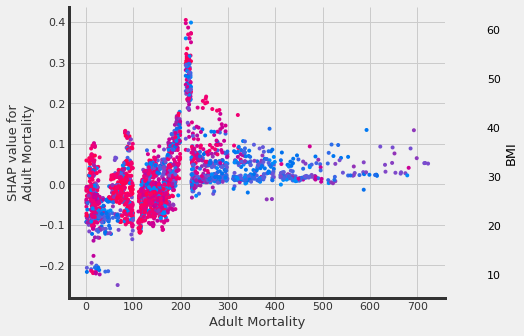

In [63]:
# specific index value
slearner.plot_shap_dependence(treatment_group='treatment_A',
                              feature_idx=0,
                              X=X,
                              tau=slearner_tau,
                              interaction_idx=4,
                              shap_dict=shap_slearner, 
                              features=feature_names)

## Interpretation 3
We can see from the above two graphs:
- ###### interaction between Income composition of resources and Schooling <br>
    - We can see that as income composition of a country increases, more schooling has a negative impact on life expectancy and if income composition of a country decreases, better schooling has a positive impact on life expectancy
- ###### interaction between Adult Mortality and BMI <br>
    - We can see from the graph that when Adult Mortality is low, and BMI is very low, it leads to lower life expectancy.
    - When the adult mortality is high and the BMI is medium , it leads to higher life expectancy
    - When adult mortality is low and BMI is high, it leads to better life expectancy
    - When adult mortality is average and BMI is high, it leads to lower life expectancy
    - When adult mortality is average and BMI is low, it leads to better life expectancy than previous point


 
# Training the S learner with Linear regression
- Scaled the X variable for Linear regression

In [83]:
X = scaler.fit_transform(X)
model_tau = LinearRegression()
base_algo = LinearRegression()

slearner = BaseSRegressor(base_algo, control_name='control')
slearner.estimate_ate(X, w_multi, y)

array([3.20799553e+13])

In [84]:
slearner_tau = slearner.fit_predict(X, w_multi, y)

In [85]:
slearner_tau

array([[3.20799553e+13],
       [3.20799553e+13],
       [3.20799553e+13],
       ...,
       [3.20799553e+13],
       [3.20799553e+13],
       [3.20799553e+13]])

In [86]:
# Auto feature importance
slearner.get_importance(X=X, 
                        tau=slearner_tau,
                        normalize=True, 
                        method='auto', 
                        features=feature_names)

{'treatment_A': Adult Mortality                    1.0
 thinness 5-9 years                 0.0
 Alcohol                            0.0
 Total expenditure                  0.0
 Hepatitis B                        0.0
 Schooling                          0.0
 Income composition of resources    0.0
 Population                         0.0
 Developing                         0.0
 thinness  1-19 years               0.0
 infant deaths                      0.0
 HIV/AIDS                           0.0
 Diphtheria                         0.0
 Polio                              0.0
 under-five deaths                  0.0
 BMI                                0.0
 Measles                            0.0
 percentage expenditure             0.0
 Disease                            0.0
 dtype: float64}

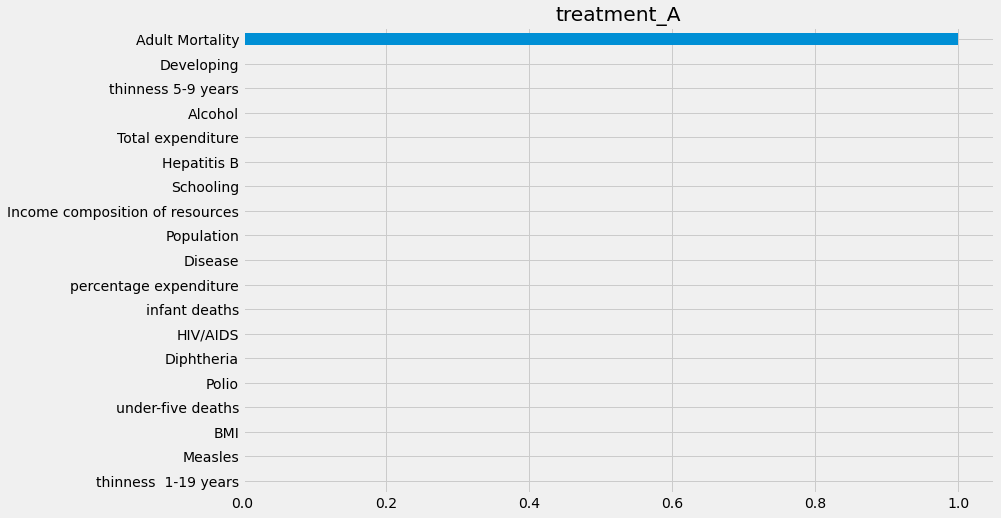

In [87]:
slearner.plot_importance(X=X, 
                         tau=slearner_tau, 
                         normalize=True, 
                         method='auto', 
                         features=feature_names)

In [88]:
# Permutation feature selection
slearner.get_importance(X=X, 
                        tau=slearner_tau, 
                        method='permutation', 
                        features=feature_names, 
                        random_state=42)

{'treatment_A': Adult Mortality                    0.0
 thinness 5-9 years                 0.0
 Alcohol                            0.0
 Total expenditure                  0.0
 Hepatitis B                        0.0
 Schooling                          0.0
 Income composition of resources    0.0
 Population                         0.0
 Developing                         0.0
 thinness  1-19 years               0.0
 infant deaths                      0.0
 HIV/AIDS                           0.0
 Diphtheria                         0.0
 Polio                              0.0
 under-five deaths                  0.0
 BMI                                0.0
 Measles                            0.0
 percentage expenditure             0.0
 Disease                            0.0
 dtype: float64}

In [89]:
slearner.get_importance(X=X, 
                        tau=slearner_tau, 
                        method='permutation', 
                        features=feature_names, 
                        random_state=42)

{'treatment_A': Adult Mortality                    0.0
 thinness 5-9 years                 0.0
 Alcohol                            0.0
 Total expenditure                  0.0
 Hepatitis B                        0.0
 Schooling                          0.0
 Income composition of resources    0.0
 Population                         0.0
 Developing                         0.0
 thinness  1-19 years               0.0
 infant deaths                      0.0
 HIV/AIDS                           0.0
 Diphtheria                         0.0
 Polio                              0.0
 under-five deaths                  0.0
 BMI                                0.0
 Measles                            0.0
 percentage expenditure             0.0
 Disease                            0.0
 dtype: float64}

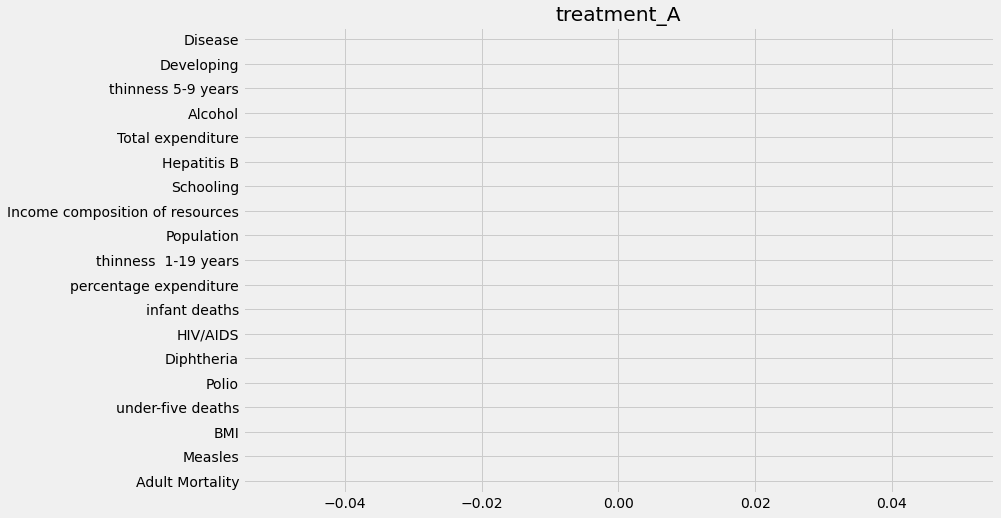

In [90]:
slearner.plot_importance(X=X, 
                         tau=slearner_tau, 
                         method='permutation', 
                         features=feature_names, 
                         random_state=42)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, slearner_tau, test_size=0.3, random_state=42)
model_tau_fit = model_tau.fit(X_train, y_train)

perm_imp_test = permutation_importance(
    estimator=model_tau_fit, 
    X=X_test, 
    y=y_test, 
    random_state=42).importances_mean
pd.Series(perm_imp_test, feature_names).sort_values(ascending=False)

thinness 5-9 years                 0.207080
BMI                                0.155929
Alcohol                            0.152212
Developing                         0.095929
infant deaths                      0.092212
Polio                              0.065841
Adult Mortality                    0.045133
Disease                            0.014690
Measles                            0.014690
Schooling                          0.013274
Population                         0.010088
Hepatitis B                        0.000177
Diphtheria                        -0.013097
HIV/AIDS                          -0.022478
Income composition of resources   -0.030088
under-five deaths                 -0.038761
Total expenditure                 -0.089735
percentage expenditure            -0.112212
thinness  1-19 years              -0.194690
dtype: float64

Text(0.5, 1.0, 'Permutation Importances for Test Dataset')

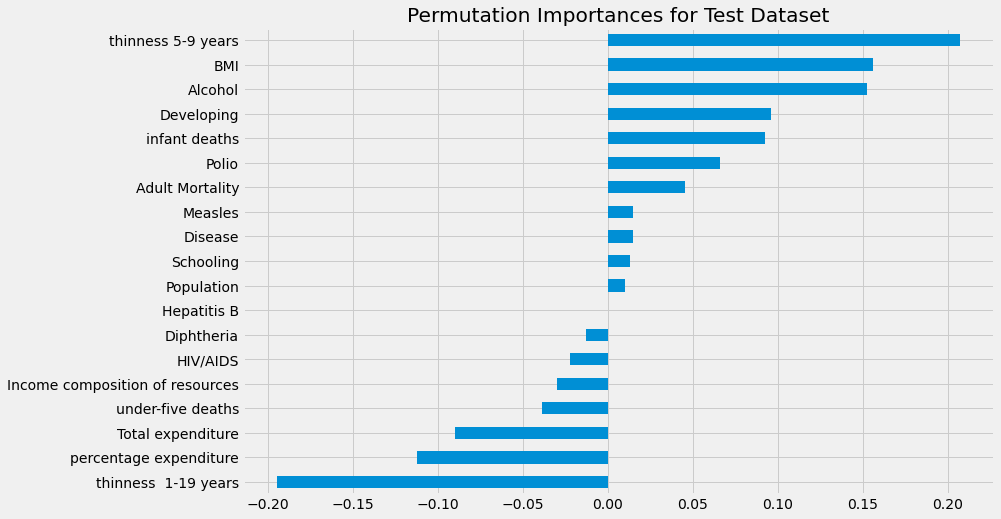

In [92]:
pd.Series(perm_imp_test, feature_names).sort_values().plot(kind='barh', figsize=(12, 8))
plt.title('Permutation Importances for Test Dataset')

In [93]:
perm_imp_train = permutation_importance(
    estimator=model_tau_fit, 
    X=X_train, 
    y=y_train, 
    random_state=42).importances_mean
pd.Series(perm_imp_train, feature_names).sort_values(ascending=False)

thinness 5-9 years                 0.019955
Alcohol                            0.017311
BMI                                0.015103
infant deaths                      0.013197
Polio                              0.009579
Developing                         0.006521
Adult Mortality                    0.004416
Schooling                          0.001004
Population                         0.000650
Disease                            0.000510
Measles                            0.000510
Hepatitis B                        0.000502
under-five deaths                  0.000443
Diphtheria                        -0.001278
Income composition of resources   -0.002016
HIV/AIDS                          -0.002393
Total expenditure                 -0.008434
percentage expenditure            -0.010147
thinness  1-19 years              -0.019135
dtype: float64

Text(0.5, 1.0, 'Permutation Importances for Train Dataset')

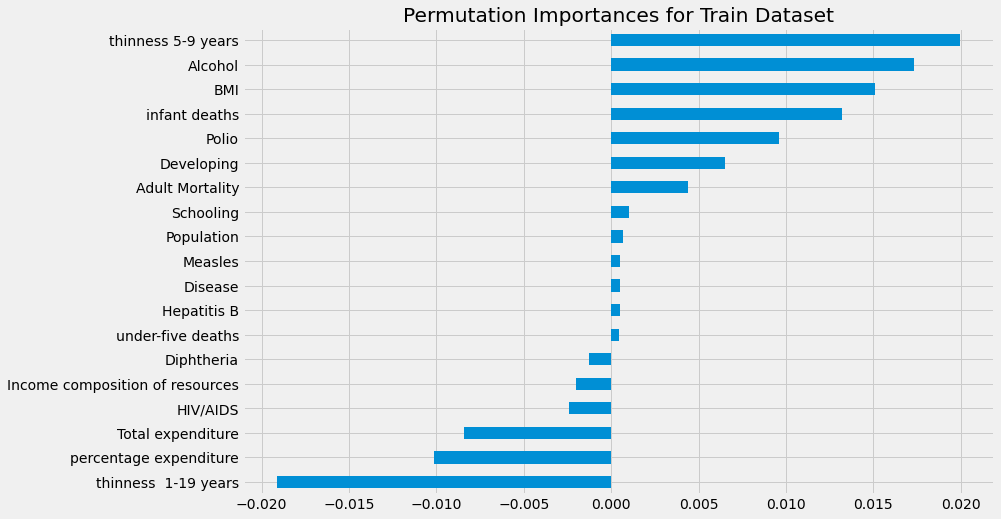

In [94]:
pd.Series(perm_imp_train, feature_names).sort_values().plot(kind='barh', figsize=(12, 8))
plt.title('Permutation Importances for Train Dataset')

In [95]:
shap_slearner = slearner.get_shap_values(X=X, tau=slearner_tau)
shap_slearner

{'treatment_A': array([[-9.15527344e-05,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-9.15527344e-05,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-9.15527344e-05,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [-9.15527344e-05,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-9.15527344e-05,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-9.15527344e-05,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])}

In [96]:
np.mean(np.abs(shap_slearner['treatment_A']),axis=0)

array([8.81290172e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

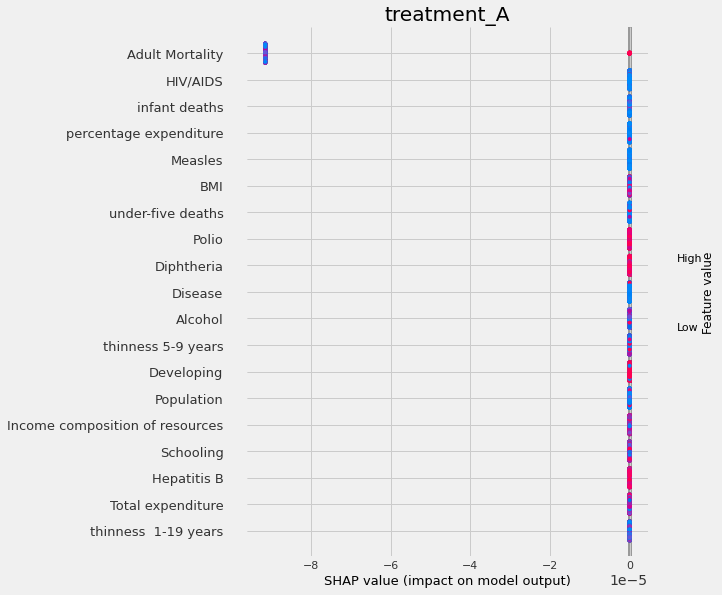

In [97]:
slearner.plot_shap_values(X=X, tau=slearner_tau, features=feature_names)

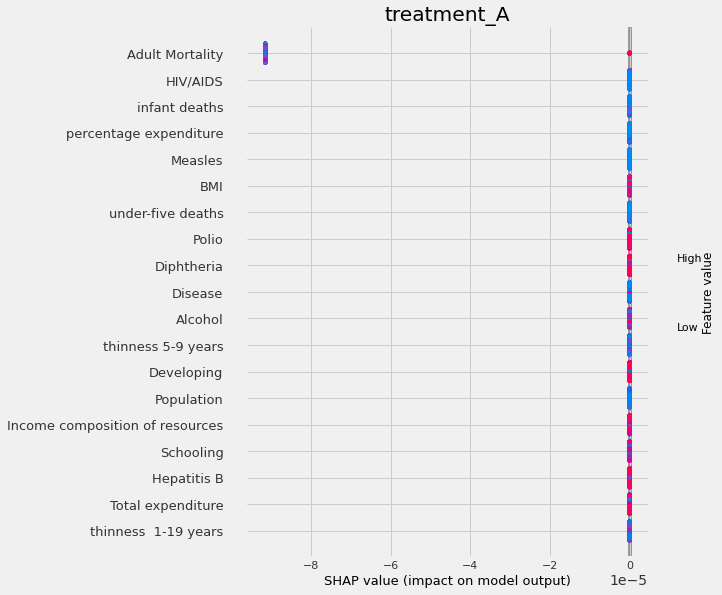

In [98]:
slearner.plot_shap_values(X=X, shap_dict=shap_slearner, features=feature_names)

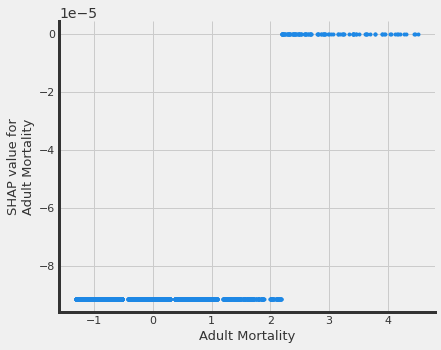

In [99]:
# None interaction index 
slearner.plot_shap_dependence(treatment_group='treatment_A',
                              feature_idx=0,
                              X=X,
                              tau=slearner_tau,
                              interaction_idx=None,
                              shap_dict=shap_slearner,
                              features=feature_names)

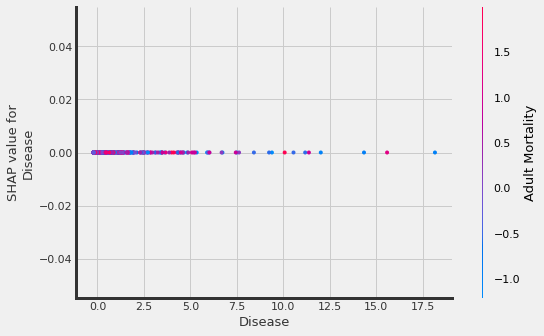

In [100]:
# Auto interaction index
slearner.plot_shap_dependence(treatment_group='treatment_A',
                              feature_idx='Disease',
                              X=X,
                              tau=slearner_tau,
                              interaction_idx='auto',
                              shap_dict=shap_slearner,
                              features=feature_names)

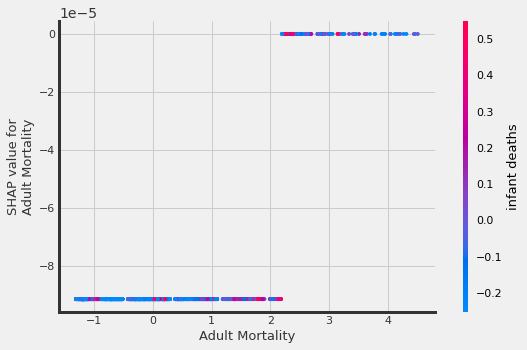

In [101]:
# interaction_idx set to specific index
slearner.plot_shap_dependence(treatment_group='treatment_A',
                              feature_idx=0,
                              X=X,
                              tau=slearner_tau,
                              interaction_idx='infant deaths',
                              shap_dict=shap_slearner, 
                              features=feature_names)

## Interpretation 4
##### Interaction between Adult Mortality and infant deaths
- We can see from the above graph that countries wuth lower infant deaths have lower odds of adult mortality.
- Also for high adult mortality there are most of the countries with lower infant deaths

## Interpretation 5
- XGB regressor captures the variations between variables much better than Linear regression
    - According to linear regression, only one variable that is Adult Mortality will impact the overall life expectancy
    - We have seen before that MSE with linear regression is much higher than the tree based methods so that is expected
    - Permutation plot of train and test datasets shows no importance for schooling for predicting life expectancy while Schooling is one of the most important factors in XGB regressor permutation importance